In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!git clone https://github.com/NVIDIA/pix2pixHD.git

Cloning into 'pix2pixHD'...
remote: Enumerating objects: 340, done.
remote: Total 340 (delta 0), reused 0 (delta 0), pack-reused 340
Receiving objects: 100% (340/340), 55.68 MiB | 33.66 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [3]:
import os
os.chdir('pix2pixHD/')

In [ ]:
# !chmod 755 /content/gdrive/My\ Drive/Images_for_GAN/datasets/download_convert_apples_dataset.sh
# !/content/gdrive/My\ Drive/Images_for_GAN/datasets/download_convert_apples_dataset.sh

In [4]:
!ls

_config.yml	    imgs	 precompute_feature_maps.py  test.py
data		    LICENSE.txt  README.md		     train.py
datasets	    models	 run_engine.py		     util
encode_features.py  options	 scripts


In [5]:
!pip install dominate

In [6]:
import numpy as np
import scipy
import matplotlib
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# import pydmd 
#from pydmd import DMD

%matplotlib inline
import scipy.integrate
from matplotlib import animation
from IPython.display import HTML

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

from PIL import Image
from skimage import io

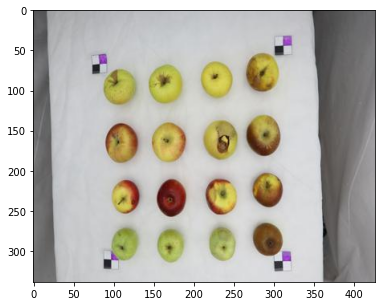

<class 'numpy.ndarray'>
- Number of Pixels: 433242
- Shape/Dimensions: (339, 426, 3)


In [7]:
# Example of RGB image from A
apples_example1 = cv2.imread('/content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/A/20_12_26_22_15_00_Canon_top_all_on.jpg')
apples_example1 = cv2.cvtColor(apples_example1, cv2.COLOR_BGR2RGB)
plt.imshow(apples_example1)
plt.show()

print(type(apples_example1))
print("- Number of Pixels: " + str(apples_example1.size))
print("- Shape/Dimensions: " + str(apples_example1.shape))

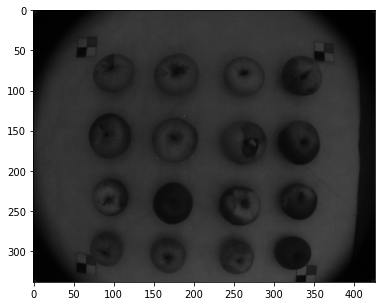

<class 'numpy.ndarray'>
- Number of Pixels: 433242
- Shape/Dimensions: (339, 426, 3)


In [8]:
# Example of RGB image from B
apples_example2 = cv2.imread('/content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/B/set10_20201226_221732_686_00000_channel7.png')
apples_example2 = cv2.cvtColor(apples_example2, cv2.COLOR_BGR2RGB)
plt.imshow(apples_example2)
plt.show()

print(type(apples_example2))
print("- Number of Pixels: " + str(apples_example2.size))
print("- Shape/Dimensions: " + str(apples_example2.shape))

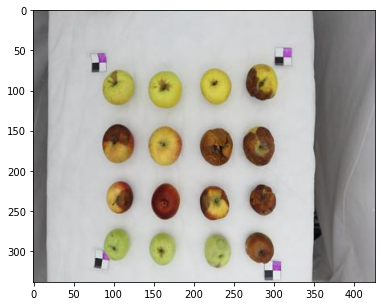

<class 'numpy.ndarray'>
- Number of Pixels: 433242
- Shape/Dimensions: (339, 426, 3)


In [9]:
# Example of RGB image from ./train_A/
apples_example3 = cv2.imread('/content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train/train_A/20210111_171500.png')
apples_example3 = cv2.cvtColor(apples_example3, cv2.COLOR_BGR2RGB)
plt.imshow(apples_example3)
plt.show()

print(type(apples_example3))
print("- Number of Pixels: " + str(apples_example3.size))
print("- Shape/Dimensions: " + str(apples_example3.shape))

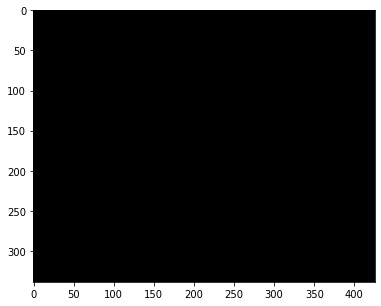

<class 'numpy.ndarray'>
- Number of Pixels: 433242
- Shape/Dimensions: (339, 426, 3)


In [10]:
# Example of RGB image from ./train_B/
apples_example4 = cv2.imread('/content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train/train_B/20210111_134500.png')
apples_example4 = cv2.cvtColor(apples_example4, cv2.COLOR_BGR2RGB)
plt.imshow(apples_example4)
plt.show()

print(type(apples_example4))
print("- Number of Pixels: " + str(apples_example4.size))
print("- Shape/Dimensions: " + str(apples_example4.shape))

In [ ]:
#!python train.py --loadSize 512 --fineSize 512 --label_nc 0 --no_instance --name apples_RGB_NIR --dataroot /content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train --checkpoints_dir /content/gdrive/MyDrive/Images_for_GAN/checkpoints  --model Pix2PixHD --save_epoch_freq 5  

------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: /content/gdrive/MyDrive/Images_for_GAN/checkpoints
continue_train: False
data_type: 32
dataroot: /content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train
debug: False
display_freq: 100
display_winsize: 512
feat_num: 3
fineSize: 512
fp16: False
gpu_ids: [0]
input_nc: 3
instance_feat: False
isTrain: True
label_feat: False
label_nc: 0
lambda_feat: 10.0
loadSize: 512
load_features: False
load_pretrain: 
local_rank: 0
lr: 0.0002
max_dataset_size: inf
model: Pix2PixHD
nThreads: 2
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_layers_D: 3
n_local_enhancers: 1
name: apples_RGB_NIR
ndf: 64
nef: 16
netG: global
ngf: 64
niter: 100
niter_decay: 100
niter_fix_global: 0
no_flip: False
no_ganFeat_loss: False
no_html: False
no_instance: True
no_lsgan: False
no_vgg_loss: False
norm: instance
num_D: 2
output_nc: 3
phase: train
pool_size: 0
print_freq: 100
resize_or_crop: scale_w

In [11]:
path_train_A = '/content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train/train_A/'
print('path_train_A: ', path_train_A)
print('Number of images in path_train_A:', len(path_train_A))

path_train_B = '/content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train/train_B/'
print('path_train_B: ', path_train_B)
print('Number of images in path_train_B:', len(path_train_B))

path_train_A:  /content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train/train_A/
Number of images in path_train_A: 68
path_train_B:  /content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train/train_B/
Number of images in path_train_B: 68


In [12]:
# !python train.py --name apples_trash --dataroot /content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/Trash --checkpoints_dir /content/gdrive/MyDrive/Images_for_GAN/checkpoints --norm batch --loadSize 512 --fineSize 512 --label_nc 0 --no_instance
!python train.py --name apples_trash_1 --dataroot /content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train --label_nc 0 --no_instance --loadSize 320 --fineSize 160 --resize_or_crop resize_and_crop

------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: False
data_type: 32
dataroot: /content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/train
debug: False
display_freq: 100
display_winsize: 512
feat_num: 3
fineSize: 160
fp16: False
gpu_ids: [0]
input_nc: 3
instance_feat: False
isTrain: True
label_feat: False
label_nc: 0
lambda_feat: 10.0
loadSize: 320
load_features: False
load_pretrain: 
local_rank: 0
lr: 0.0002
max_dataset_size: inf
model: pix2pixHD
nThreads: 2
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_layers_D: 3
n_local_enhancers: 1
name: apples_trash_1
ndf: 64
nef: 16
netG: global
ngf: 64
niter: 100
niter_decay: 100
niter_fix_global: 0
no_flip: False
no_ganFeat_loss: False
no_html: False
no_instance: True
no_lsgan: False
no_vgg_loss: False
norm: instance
num_D: 2
output_nc: 3
phase: train
pool_size: 0
print_freq: 100
resize_or_crop: resize_and_crop
save_epoch_freq: 10
save_lat

In [ ]:
# !python train.py --name apples_trash --dataroot /content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/Trash --checkpoints_dir /content/gdrive/MyDrive/Images_for_GAN/checkpoints --norm batch --loadSize 512 --fineSize 512 --label_nc 0 --no_instance
!python train.py --name apples_train_1 --dataroot /content/gdrive/MyDrive/Images_for_GAN/apples_RGB_NIR/Trash --label_nc 0 --no_instance --loadSize 320 --fineSize 160 --resize_or_crop resize_and_crop